In [6]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
sys.path.append('/home/onno/Thesis/Scripts')
import my_tools
from my_tools import file_dic, plot_dic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SystemExit: 

/home/onno/miniconda3/envs/thesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


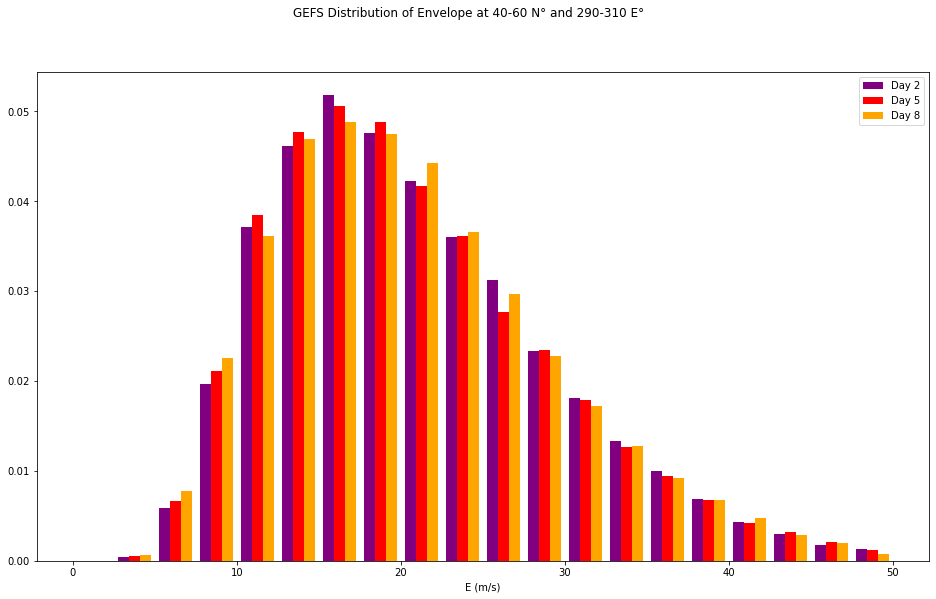

In [7]:
path = '/media/onno/Algemeen/Thesis/GFS_histogram/'
path_file = '/media/onno/Algemeen/Thesis/'
variablez = ['envelope','phasespeed','u_wind']
# latz = [(80,60),(60,40),(40,20)]
# lonz = [(320,340),(290,310),(320,340)]
latz = [(60,40)]
lonz = [(290,310)]
dayz = [2,5,8]
y_limz = [3000,3500,2500]
rangez = [(0,50),(-10,20),(-10,50)]
for j,variable in enumerate(variablez):
    for i in range(len(latz)):
        fig,ax = plt.subplots(figsize=(16,9))
        ds_day2 = xr.open_dataset(path+'/GFS_error_weighted_mean_{}_day_02_lat_lower_left_{}_lon_lower_left_{}_attempt2.nc'.format(variable,latz[i][1],lonz[i][0]),
                                 decode_times=False)
        ds_day5 = xr.open_dataset(path+'/GFS_error_weighted_mean_{}_day_05_lat_lower_left_{}_lon_lower_left_{}_attempt2.nc'.format(variable,latz[i][1],lonz[i][0]),
                                 decode_times=False)
        ds_day8 = xr.open_dataset(path+'/GFS_error_weighted_mean_{}_day_08_lat_lower_left_{}_lon_lower_left_{}_attempt2.nc'.format(variable,latz[i][1],lonz[i][0]),
                                 decode_times=False)
        ax.hist(x=[ds_day2[plot_dic[variable]['data_variable']].values,ds_day5[plot_dic[variable]['data_variable']].values,ds_day8[plot_dic[variable]['data_variable']].values],
                bins=20,range=rangez[j],color=['purple','red','orange'],density=True)
        ax.legend(['Day 2','Day 5','Day 8'])
#         ax.set_ylim([0,y_limz[j]])
#         ax.set_ylabel('N')
        ax.set_xlabel(plot_dic[variable]['label'])
        fig.suptitle('GEFS Distribution of {} at {}-{} N° and {}-{} E°'.format(plot_dic[variable]['title'],
                                                                      latz[i][1],latz[i][0],
                                                                      lonz[i][0],lonz[i][1]))
        sys.exit()
#         fig.savefig(path+'/Histogram_{}_lat_lower_left_{}_lon_lower_left_{}_norm.png'.format(variable,latz[i][1],lonz[i][0]))
#         plt.close(fig)
